In [9]:
# Set project directory
import os
import sys

def project_dir():
    notebook_path = %pwd
    repo_name = "nsl_kdd"
    repo_folder = notebook_path.split(repo_name)[0]
    return os.path.join(repo_folder, repo_name)

pwd = os.getenv("PWD", project_dir())
os.environ["PWD"] = pwd
sys.path.append(pwd)

In [10]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.decomposition import PCA

import time

from data_utils import load_train_test_data
from src.feature_extraction import CategoricalAutoencoder


import warnings
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)

# Load data

In [11]:
(X_train, X_test, Y_train, Y_test), attack_labels, categories = load_train_test_data(pwd=pwd, include_categorical=True, return_categories=True)

In [12]:
X = np.vstack([X_train, X_test])
Y = np.vstack([Y_train, Y_test])
nsl_lables = np.argmax(Y[:], axis=1)

# Utils

In [13]:
def plot_history(history, title=None, ymax=None):
    plt.figure(figsize=(10, 7))
    
    X = np.arange(1, len(history['loss']) + 1)
    
    plt.plot(X, history['loss'], label='train')
    
    if ymax is not None:
        plt.ylim(0, ymax)

    plt.grid()
    plt.legend()
        
    plt.title(title)
    plt.show()

In [17]:
path = pwd + "/src/feature_extraction"
TRAIN_AUTOENCODER = False

# Training

In [15]:
N_BOTTLENECK_LIST = [2, 4, 8, 16]

2


2022-05-28 16:27:52.033066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  18/4642 [..............................] - ETA: 27s - loss: 0.1514 - dense_51_loss: 0.1510 - dense_52_loss: 1.1583e-08 - dense_53_loss: 1.4426e-05 - dense_54_loss: 4.1751e-04

2022-05-28 16:31:16.830173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4642/4642 [==============================] - 25s 5ms/step - loss: 0.1614 - dense_51_loss: 0.1612 - dense_52_loss: 4.0512e-07 - dense_53_loss: 2.1495e-05 - dense_54_loss: 1.3531e-04
Loss: 0.1614


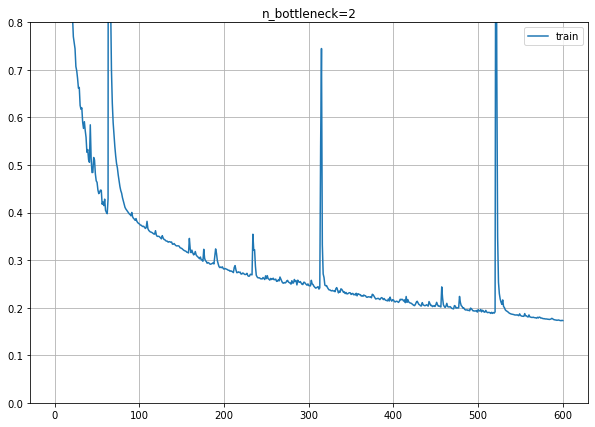

4


2022-05-28 16:31:42.726737: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  17/4642 [..............................] - ETA: 30s - loss: 0.0401 - dense_62_loss: 0.0401 - dense_63_loss: 2.1335e-09 - dense_64_loss: 7.0540e-08 - dense_65_loss: 5.1946e-07

2022-05-28 16:35:07.882036: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4642/4642 [==============================] - 26s 6ms/step - loss: 0.0386 - dense_62_loss: 0.0386 - dense_63_loss: 3.3688e-08 - dense_64_loss: 1.0063e-06 - dense_65_loss: 5.8034e-06
Loss: 0.0386


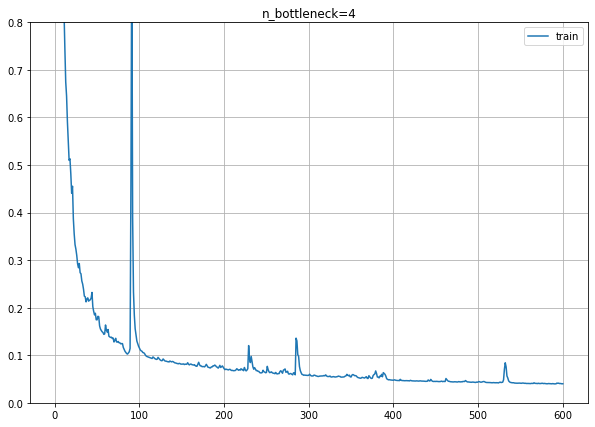

8


2022-05-28 16:35:34.575695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  18/4642 [..............................] - ETA: 28s - loss: 0.0240 - dense_73_loss: 0.0240 - dense_74_loss: 2.6383e-09 - dense_75_loss: 3.2966e-08 - dense_76_loss: 2.4138e-08

2022-05-28 16:38:57.497332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4642/4642 [==============================] - 25s 5ms/step - loss: 0.0177 - dense_73_loss: 0.0177 - dense_74_loss: 2.4271e-08 - dense_75_loss: 2.7072e-07 - dense_76_loss: 2.8883e-07
Loss: 0.0177


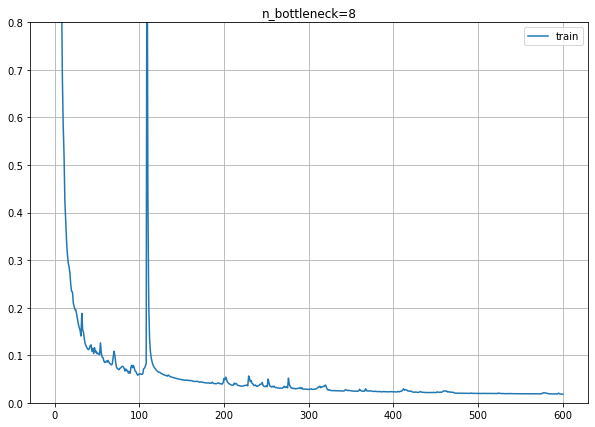

16


2022-05-28 16:39:22.823022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  18/4642 [..............................] - ETA: 28s - loss: 0.0091 - dense_84_loss: 0.0091 - dense_85_loss: 2.2338e-10 - dense_86_loss: 6.2566e-08 - dense_87_loss: 1.5095e-08

2022-05-28 16:42:51.030914: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4642/4642 [==============================] - 25s 5ms/step - loss: 0.0099 - dense_84_loss: 0.0099 - dense_85_loss: 7.9349e-09 - dense_86_loss: 1.3869e-07 - dense_87_loss: 1.1356e-07
Loss: 0.0099


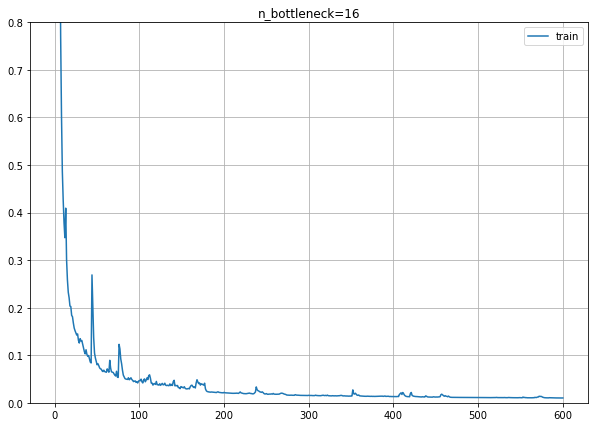

In [16]:
for n_bottleneck in N_BOTTLENECK_LIST:
    print('=============================================================================')
    print(n_bottleneck)
    print('=============================================================================')
    categorical_autoencoder = CategoricalAutoencoder(n_bottleneck, root=path)
    
    if TRAIN_AUTOENCODER:
        categorical_autoencoder.compile_and_train(X, n_epochs=600, lr=0.002, lr_patience=20, verbose=0)
    else:
        categorical_autoencoder.load_weights(load_history=True)
    
    print(f'Loss: {categorical_autoencoder.compile_and_evaluate(X)[0]:0.4f}')
    plot_history(categorical_autoencoder.history, f'n_bottleneck={n_bottleneck}', ymax=0.8)